In [1]:
import pandas as pd

In [3]:
#Leitura dos 5 arquivos de forma permanente no drive
df1 = pd.read_excel("/content/drive/MyDrive/Curso_Python_Pandas_Digital_Innovation-master/datasets/Aracaju.xlsx")
df2 = pd.read_excel("/content/drive/MyDrive/Curso_Python_Pandas_Digital_Innovation-master/datasets/Fortaleza.xlsx")
df3 = pd.read_excel("/content/drive/MyDrive/Curso_Python_Pandas_Digital_Innovation-master/datasets/Natal.xlsx")
df4 = pd.read_excel("/content/drive/MyDrive/Curso_Python_Pandas_Digital_Innovation-master/datasets/Recife.xlsx")
df5 = pd.read_excel("/content/drive/MyDrive/Curso_Python_Pandas_Digital_Innovation-master/datasets/Salvador.xlsx")


In [4]:
#Juntando todos os arquivos através da concatenação
df = pd.concat([df1,df2,df3,df4,df5])

In [5]:
#Exibindo as 5 primeiras linhas
df.head(10)

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8
5,Aracaju,2018-01-01,156.20,1522,1
6,Aracaju,2018-01-01,35.50,1522,2
7,Aracaju,2019-01-01,172.22,1522,6
8,Aracaju,2019-01-01,12.16,1523,1
9,Aracaju,2019-01-01,149.36,1523,3


In [13]:
df["Receita"] = df["Vendas"].mul(df["Qtde"])
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


## **Visualização de dados**


In [6]:
#Contagem de vendas da LojaID
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
1523     29
852      29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

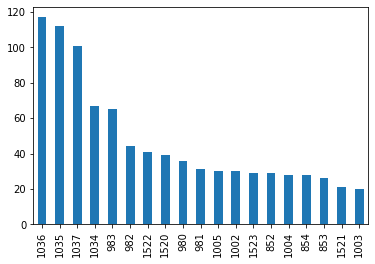

In [7]:
#Mostrando essas informações em gráfico
#Grafico de barras
df["LojaID"].value_counts(ascending=False).plot.bar();

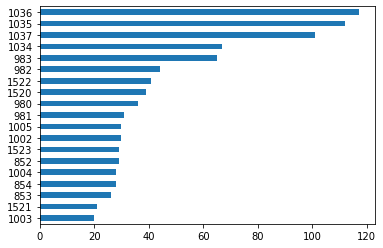

In [8]:
#Criando um gráfico de barras horizontais | Do maior para o menor
#Para remover a linha a cima do gráfico, só colocar no final um ";"
df["LojaID"].value_counts(ascending=True).plot.barh();

In [10]:
#Importando a bilioteca matplotlib
import matplotlib.pyplot as plt

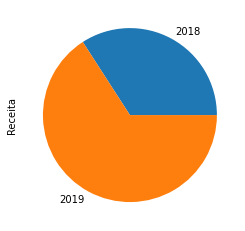

In [15]:
#Gráfico de pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [16]:
#Total de vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Recife       142
Fortaleza    142
Aracaju      130
Name: Cidade, dtype: int64

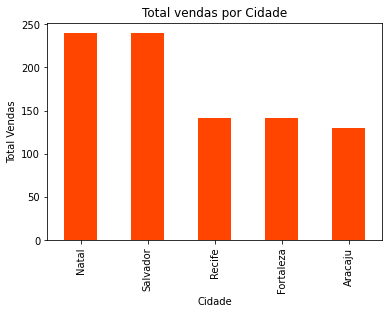

In [17]:
#Importando a biblioteca "matplotlib"
#Adicionando um título, alterando o nome dos eixos e alterando a cor do gráfico
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade", color="orangered")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [18]:
#Alterando o estilo
plt.style.use("ggplot")

In [20]:
#Extraindo o dia e o mês da venda
df["dia_venda"], df["mes_venda"] = (df["Data"].dt.month, df["Data"].dt.day)
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,dia_venda,mes_venda
50,Fortaleza,2019-01-01,33.69,1005,3,101.07,1,1
45,Aracaju,2018-01-01,131.12,1523,5,655.60,1,1
109,Aracaju,2018-01-01,51.64,1523,5,258.20,1,1
132,Natal,2019-01-02,19.61,1036,2,39.22,1,2
95,Recife,2019-01-01,40.03,982,3,120.09,1,1
196,Salvador,2019-01-02,145.09,1036,2,290.18,1,2
236,Salvador,2019-01-03,126.29,1035,3,378.87,1,3
127,Recife,2019-03-02,39.56,982,8,316.48,3,2
119,Recife,2019-03-02,152.30,982,7,1066.10,3,2
11,Aracaju,2019-01-01,161.53,1520,4,646.12,1,1


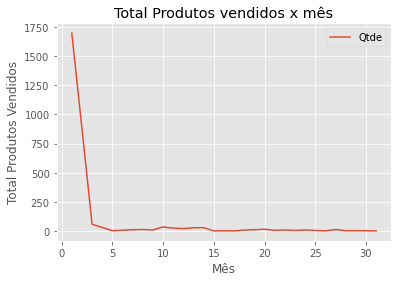

In [21]:
#Criando um novo gráfico | Total de produtos vendidos x mês
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title = "Total Produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

In [22]:
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     1696
2      881
3       59
5        4
7       12
8       14
9       10
10      36
11      26
12      22
13      29
14      30
15       2
16       3
17       2
18       9
20      16
21       7
22      10
23       6
24      10
25       6
26       2
27      14
28       4
30       4
31       2
Name: Qtde, dtype: int64

In [28]:
#Selecionamento apenas as vendas de 2019
df_2019 = df[df["Ano_venda"] == 2019]

Text(0, 0.5, 'Total Produtos')

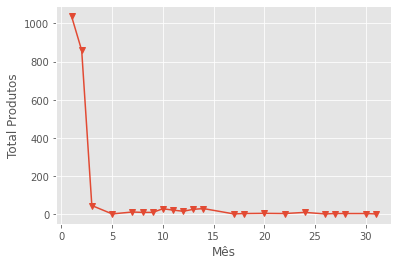

In [29]:
#Total de produtos vendidso por mês
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.xlabel("Mês")
plt.ylabel("Total Produtos")

In [26]:
#Criando uma nova coluna com o ano
df["Ano_venda"] = df["Data"].dt.year
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,dia_venda,mes_venda,Ano_venda
70,Recife,2019-01-01,20.40,983,7,142.80,1,1,2019
64,Salvador,2019-01-01,37.96,1037,3,113.88,1,1,2019
190,Salvador,2019-01-02,78.78,1035,3,236.34,1,2,2019
103,Fortaleza,2019-01-01,142.57,1002,3,427.71,1,1,2019
58,Recife,2019-01-01,8.02,983,2,16.04,1,1,2019


In [27]:
#Selecionamento apenas as vendas de 2019
df_2019 = df[df["Ano_venda"] == 2019]

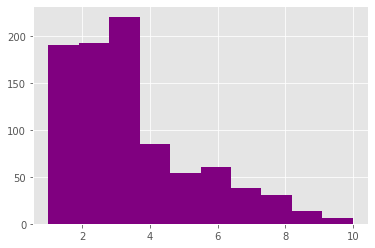

In [30]:
#Plotando um gráfico de histograma, determinando a quantidade e uma cor
plt.hist(df["Qtde"], color="purple");

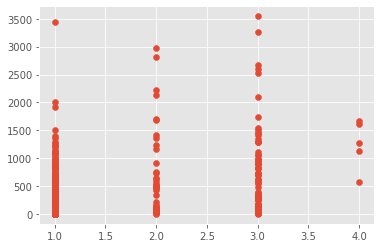

In [31]:
plt.scatter(x=df_2019["dia_venda"], y = df_2019["Receita"])

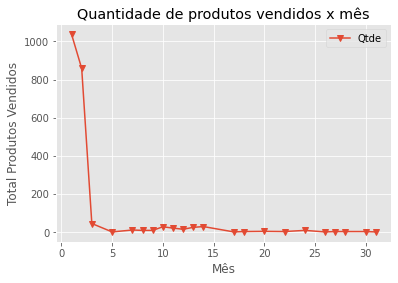

In [32]:
#Salvando essas imagens e gráficos criados
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();
plt.savefig("grafico QTDE x MES.png")